# PyIntro-A2 - File Handling and Output Parsing

There are many way to access/edit/search/delete/update files and directories in python. The most basic one is the [os](https://docs.python.org/3/library/os.html) module that provides a portable way of using operating system dependent functionality. If you just want to read or write a file see [open()](https://docs.python.org/3/library/functions.html#open), if you want to manipulate paths, see the [os.path](https://docs.python.org/3/library/os.path.html#module-os.path) module, and if you want to read all the lines in all the files on the command line see the [fileinput](https://docs.python.org/3/library/fileinput.html#module-fileinput) module. For creating temporary files and directories see the [tempfile](https://docs.python.org/3/library/tempfile.html#module-tempfile) module, and for high-level file and directory handling see the [shutil](https://docs.python.org/3/library/shutil.html#module-shutil) module.

The will introduce the following standard modules briefly here are to work with files and directories are:
- `os`: Miscellaneous operating system interfaces ([Documentation](https://docs.python.org/3/library/os.html)).

## Availablility of the function between different architectures:

Python tries to help you write portable codes between any architecture. Unfortunately, there are limits. The `os` module enables you to write an OS-independent code.  It does a great job of trying to provide functions tight to the OS that will work in as many systems as possible in a transparent way. However, there are limits. Therefore, not all functions are available to every architecture (**You have been warned**).

- The design of all built-in operating system dependent modules of Python is such that as long as the same functionality is available, it uses the same interface
- Extensions peculiar to a particular operating system are also available through the os module, but using them is of course a threat to portability.
- All functions accepting path or file names accept both bytes and string objects, and result in an object of the same type, if a path or file name is returned.
- On VxWorks, os.fork, os.execv and os.spawn*p* are not supported.

### Checking your architecture:

In [2]:
import os
os.name

'posix'

Usual architectures are:

- **posix:** linux, MacOS, FreeBSD, unix, [Microsoft WSL](https://docs.microsoft.com/en-us/windows/wsl/wsl2-index),...
- **nt:** Windows
- **java:** Adroid

You can find additional details of your machine with:

In [3]:
import os
os.uname()

posix.uname_result(sysname='Linux', nodename='cerberus', release='5.7.10-arch1-1', version='#1 SMP PREEMPT Wed, 22 Jul 2020 19:57:42 +0000', machine='x86_64')

#### Listing the capabilities of the `os` module in your system

Not all the functions included in the os module are available in all the systems. They can be OS, platform, and system configuration dependent. You can check which functions of the `os` module to handle files are available in a system by:

In [5]:
import os
os.supports_fd

{<function posix.chdir(path)>,
 <function posix.chmod(path, mode, *, dir_fd=None, follow_symlinks=True)>,
 <function posix.chown(path, uid, gid, *, dir_fd=None, follow_symlinks=True)>,
 <function posix.execve(path, argv, env)>,
 <function posix.listdir(path=None)>,
 <function posix.pathconf(path, name)>,
 <function posix.scandir(path=None)>,
 <function posix.stat(path, *, dir_fd=None, follow_symlinks=True)>,
 <function posix.statvfs(path)>,
 <function posix.truncate(path, length)>,
 <function posix.utime>}

<div class="alert alert-info"> Advise: Avoid OS specific function if possible.

## File/directory structure of the course:

```
python/
|   README.md
|   slides.sh
|
└───a1-PyIntro
|   |   a1-00-PyIntro-Intro.ipynb
|   |   a1-01-PyIntro-Datatypes.ipynb
|   |   a1-02-PyIntro-Loops_Decisions.ipynb
|   |   a1-03-PyIntro-Syntax.ipynb
|   |   a1-04-PyIntro-Functions.ipynb
|
└───a2-PyIntro
|   |   a2-01-PyIntro-IO.ipynb
|   |
|   └───data
|       |   Table_NWChem.txt
|       |   1uuh.pdb
|       |   1uuh.cif
|   
└───b1-PyInter
|
...
```

This directory/file tree will help you when navigating through the examples of this notebook.

## Python working directory

The current working directory is the folder in which the Python script is operating. It is the default directory where new files will be created by python commands when no path will be explicitly provided.

<div class="alert alert-warning"> We can change the python working path at any time during the execution of a notebook. Therefore, executing this notebook randomly may create files/directories inside undesired directories. Also, some cells in this notebook require accessing some files. If not in the correct python working path, the required files will appear missing as they are searched for elsewhere but the intended place.

### Find current working directory: `os.getcwd()`

`os.getcwd()` returns the absolute path of the working directory where Python is currently running as a string str . `getcwd` stands for "get current working directory".

In [6]:
import os
os.getcwd()

'/home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro'

<div class="alert alert-danger"> For the notebook to work it needs to point to the folder: <span style="background-color:#00FEFE">/MY/PATH/python/a2-Py-Intro/<\span>

when working with jupyter lab we can also type:

In [7]:
pwd

'/home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro'

### Save the working directory path:

We will save the `/YOUR/PATH/python/a2-PyIntro` in the variable wrkdir for future usage.

In [21]:
import os

# Default:
wrkdir = os.getcwd()

# Windows
#wrkdir = "C:/YOUR/COURSE/MAIN/DIRECTORY/python/"

# Linux/MacOSX
#wrkdir = "/home/user/directory/course/python/"

wrkdir = os.path.normpath(wrkdir)
datadir = os.path.join(wrkdir,"data")

print(wrkdir)
print(datadir)

/home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro
/home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro/data


If the default command does not point to the `/YOUR/PATH/python/a2-PyIntro` path, please set it manually by uncomenting and mofiying the coresponding line following the next two remarks:

- The path depends on the OS you have. Please select the style accordingly.
- Set the path to point exactly to `/YOUR/PATH/python/a2-PyIntro`


### Changing working directory: `os.chdir()`

`os.chdir(path)` Change the current working directory to path.

In [16]:
import os
os.chdir(wrkdir + "/data")
os.getcwd()

'/home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro/data'

This works in *posix* and *java* architectures but not in *nt* architecture. It is much better to avoid issues the following method:

In [12]:
import os
import os.path
os.chdir(os.path.join(wrkdir,"data"))
os.getcwd()

'/home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro/data'

`os.path.join()` method in Python join one or more path components intelligently. This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component. If the last path component to be joined is empty then a directory seperator (‘/’) is put at the end.

If a path component represents an absolute path, then all previous components joined are discarded and joining continues from the absolute path component.

In [19]:
# Go back to the wrkdir
import os
os.chdir(wrkdir)
os.getcwd()

'/home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro/data'

## Working with files and directories in python

### Displaying content working directory: `os.listdir()`

`os.listdir()` will print all files and directories inside you prython working directory.

In [8]:
import os
os.listdir()

['data', '.ipynb_checkpoints', 'a2-01-PyIntro-IO.ipynb']

You can list the content of another directory using the path as argument:

In [10]:
import os
os.listdir("./data")

['1uuh.cif', '1uuh.pdb', 'Table_NWChem.txt']

### Iterating over the files and directories: `os.walk()`

Generate the file names in a directory tree by walking the tree either top-down or bottom-up. For each directory in the tree rooted at directory top (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames).

In [25]:
print(os.walk("."))

<generator object walk at 0x7fbd8005de40>


#### Displaying the tree of a directory

In [28]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '', 1).count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

list_files(".")

./
    a2-01-PyIntro-IO.ipynb
    data/
        1uuh.cif
        1uuh.pdb
        Table_NWChem.txt
    .ipynb_checkpoints/
        a2-01-PyIntro-IO-checkpoint.ipynb


#### Finding the size of the content of a folder

In [54]:
import os
from os.path import join, getsize
for root, dirs, files in os.walk('.'):
    root_abs = os.path.abspath(root)
    print(f"root = {root_abs}")
    print(f"dirs =  {dirs}")
    print(f"files = {files}")
    size = sum(getsize(join(root, name)) for name in files)
    print(f"Contains {len(dirs)} directories")
    print(f"Contains {len(files)} files summing {size/(1024**2):.2f} Mbytes\n")

root = /home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro
dirs =  ['data', '.ipynb_checkpoints']
files = ['a2-01-PyIntro-IO.ipynb']
Contains 2 directories
Contains 1 files summing 0.07 Mbytes

root = /home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro/data
dirs =  []
files = ['1uuh.cif', '1uuh.pdb', 'Table_NWChem.txt']
Contains 0 directories
Contains 3 files summing 0.53 Mbytes

root = /home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro/.ipynb_checkpoints
dirs =  []
files = ['a2-01-PyIntro-IO-checkpoint.ipynb']
Contains 0 directories
Contains 1 files summing 0.06 Mbytes



## File handling

Python has several functions for creating, reading, updating, and deleting files.

The key function for working with files in Python is the `open()` function.

The `open()` function takes two parameters; filename, and mode.

There are four different methods (modes) for opening a file:

`"r"` - Read - Default value. Opens a file for reading, error if the file does not exist

`"a"` - Append - Opens a file for appending, creates the file if it does not exist

`"w"` - Write - Opens a file for writing, creates the file if it does not exist

`"x"` - Create - Creates the specified file, returns an error if the file exists

In addition you can specify if the file should be handled as binary or text mode

`"t"` - Text - Default value. Text mode

`"b"` - Binary - Binary mode (e.g. images)


In [22]:
# Set path to datafile
datafile = os.path.join(datadir, "Table_NWChem.txt")

### Open a file for reading it: `open(path, 'r')`

To open a file for reading it is enough to specify the name of the file:

In [26]:
f = open(datafile, "rt")
f.close()

The code above can be reduced to:

In [37]:
f = open(datafile)
f.close()

Because "r" for read, and "t" for text are the default values, you do not need to specify them.

Note: Make sure the file exists, or else you will get an error.

### Reading the content of a file

In [38]:
f = open(datafile)
for line in f:
    print(line.strip("\n"))
f.close()

@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0
@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5
@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9
@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8
@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1
@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1
@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5
@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7
@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1
@   10   -6095.26484676 -7.7D-07  0.00003  0.00001  0.00161  0.0

<div class="alert alert-warning"> Always close your files.

### Opening a file with the `with` statement

If you forget to close any open files, funny stuff can happen. Problems are apparent when writing to files, but not only> For example, you might suffer memory exhaustion, realize that the data was not fully written, or that the file is corrupted. Explicitly closing the open files solves all these issues. To avoid this remembering to close the files better use the following syntax:

In [40]:
with open(datafile) as fin:
    for line in fin:
        print(line.strip("\n"))

@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0
@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5
@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9
@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8
@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1
@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1
@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5
@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7
@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1
@   10   -6095.26484676 -7.7D-07  0.00003  0.00001  0.00161  0.0

The `with` statement takes care of closing the file when exiting the block. Moreover, it saves you typing one line, and the indentation signals you when you are still working with the files.

<div class="alert alert-info"> I cannot recommend enough opening files with the with statement.

### Open a file for writing it: `open(path, 'w')`

To open a file for writing do:

In [53]:
with open("newfile.txt", 'w') as fout:
    fout.write("This is the first line of the new file.\n")
    fout.write("This is the second line of the new file.")
    
with open("newfile.txt", 'r') as fin:
    for line in fin:
        print(line.strip("\n"))

This is the first line of the new file.
This is the second line of the new file.


Please note that the `open(path, 'w')` will rewrite the content of the file if already exists. **Be Carefull**

In [54]:
with open("newfile.txt", 'r') as fin:
    for line in fin:
        print(line.strip("\n"))
        
with open("newfile.txt", 'w') as fout:
    fout.write("Line1.\n")
    fout.write("Line2.")
    
with open("newfile.txt", 'r') as fin:
    for line in fin:
        print(line.strip("\n"))

This is the first line of the new file.
This is the second line of the new file.
Line1.
Line2.


Note: Make sure that you have write rights and there is enough space for the file, or else you will get an error.

<div class="alert alert-warning"> Do not write or read on a closed file :)

In [49]:
with open("newfile.txt", 'w') as fout:
    pass
fout.write("Writting when the file is clossed.")

ValueError: I/O operation on closed file.

### Open a file for appending text: `open(path, 'a')`

Opens a file for appending, creates the file if it does not exist:

In [56]:
with open("newfile.txt", 'a') as fout:
    fout.write("\nLine3.")
    
with open("newfile.txt", 'r') as fin:
    for line in fin:
        print(line.strip("\n"))

Line1.
Line2.
Line3
Line3.


## Output Parsing

Parsing is the process of analyzing a string of symbols conforming to the rules of a formal grammar. The term parsing comes from Latin pars (orationis), meaning part (of speech).

As more and more of our day-to-day work is being done on and through computers, we increasingly have output that one program writes, often in a text file, that we need to analyze in one way or another, and potentially feed that output into another file.

Suppose we have the following output:

In [57]:
myoutput = """\
@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0
@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5
@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9
@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8
@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1
@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1
@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5
@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7
@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1
@   10   -6095.26484676 -7.7D-07  0.00003  0.00001  0.00161  0.00553  28155.3
@   11   -6095.26484693 -1.8D-07  0.00002  0.00000  0.00054  0.00151  28981.7
@   11   -6095.26484693 -1.8D-07  0.00002  0.00000  0.00054  0.00151  28981.7"""

This output actually came from a geometry optimization of a Silicon cluster using the [NWChem](http://www.nwchem-sw.org/index.php/Main_Page) quantum chemistry suite. At every step the program computes the energy of the molecular geometry, and then changes the geometry to minimize the computed forces, until the energy converges.

First, note that the data is entered into a multi-line string. When Python sees three quote marks """ or ''' it treats everything following as part of a single string, including newlines, tabs, and anything else, until it sees the same three quote marks (""" has to be followed by another """, and ''' has to be followed by another ''') again. This is a convenient way to quickly dump data into Python, and it also reinforces the important idea that you don't have to open a file and deal with it one line at a time. You can read everything in, and deal with it as one big chunk.

### Divide and conquer, the secret of parsing data: `str.splitlines()`
The first thing we'll do, though, is to split the big string into a list of strings, since each line corresponds to a separate piece of data. We will use the `str.splitlines()` function on the big myout string to break it into a new element every time it sees a newline (\n) character:

In [66]:
lines = myoutput.splitlines()
lines

['@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime',
 '@ ---- ---------------- -------- -------- -------- -------- -------- --------',
 '@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5',
 '@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0',
 '@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5',
 '@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9',
 '@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8',
 '@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1',
 '@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1',
 '@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5',
 '@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7',
 '@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1',
 '@   10   -6095

Splitting is a big concept in text processing. We used `str.splitlines()` here, and we will use the more general `str.split()` function below to split each line into whitespace-delimited words.

We now want to do three things:

* Skip over the lines that don't carry any information
* Break apart each line that does carry information and grab the pieces we want
* Turn the resulting data into something that we can plot.

For this data, we really only want the Energy column, the Gmax column (which contains the maximum gradient at each step), and perhaps the Walltime column. 

Since the data is now in a list of lines, we can iterate over it:

In [67]:
for line in lines[2:]:
    # do something with each line
    words = line.split()

Let's examine what we just did: first, we used a `for` loop to iterate over each line. However, we skipped the first two (the `lines[2:]` only takes the lines starting from index 2), since `lines[0]` contained the title information, and `lines[1]` contained underscores.

We then split each line into chunks (which we're calling "words", even though in most cases they're numbers) using the string `str.split()** command. Here's what split does:

In [68]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the words in the string, using sep as the delimiter string.
    
    sep
      The delimiter according which to split the string.
      None (the default value) means split according to any whitespace,
      and discard empty strings from the result.
    maxsplit
      Maximum number of splits to do.
      -1 (the default value) means no limit.



Here we're implicitly passing in the first argument (s, in the doctext) by calling a method .split() on a string object. In this instance, we're not passing in a sep character, which means that the function splits on whitespace. Let's see what that does to one of our lines:

In [69]:
print(lines[2].split())

['@', '0', '-6095.12544083', '0.0D+00', '0.03686', '0.00936', '0.00000', '0.00000', '1391.5']


This is almost exactly what we want. We just have to now pick the fields we want:

In [70]:
for line in lines[2:]:
    # do something with each line
    words = line.split()
    energy = words[2]
    gmax = words[4]
    time = words[8]
    print(energy,gmax,time)

-6095.12544083 0.03686 1391.5
-6095.25762870 0.00732 10468.0
-6095.26325979 0.00233 11963.5
-6095.26428124 0.00109 13331.9
-6095.26463203 0.00057 14710.8
-6095.26477615 0.00043 20211.1
-6095.26482624 0.00015 21726.1
-6095.26483584 0.00021 24890.5
-6095.26484405 0.00005 26448.7
-6095.26484599 0.00003 27258.1
-6095.26484676 0.00003 28155.3
-6095.26484693 0.00002 28981.7
-6095.26484693 0.00002 28981.7


This is fine for printing things out, but if we want to do something with the data, either make a calculation with it or pass it into a plotting, we need to convert the strings into regular floating point numbers. We can use the `float()` command for this. We also need to save it in some form. I'll do this as follows:

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
data = []
for line in lines[2:]:
    # do something with each line
    words = line.split()
    energy = float(words[2])
    gmax = float(words[4])
    time = float(words[8])
    data.append((energy,gmax,time))
data = np.array(data)
print(data)

[[-6.09512544e+03  3.68600000e-02  1.39150000e+03]
 [-6.09525763e+03  7.32000000e-03  1.04680000e+04]
 [-6.09526326e+03  2.33000000e-03  1.19635000e+04]
 [-6.09526428e+03  1.09000000e-03  1.33319000e+04]
 [-6.09526463e+03  5.70000000e-04  1.47108000e+04]
 [-6.09526478e+03  4.30000000e-04  2.02111000e+04]
 [-6.09526483e+03  1.50000000e-04  2.17261000e+04]
 [-6.09526484e+03  2.10000000e-04  2.48905000e+04]
 [-6.09526484e+03  5.00000000e-05  2.64487000e+04]
 [-6.09526485e+03  3.00000000e-05  2.72581000e+04]
 [-6.09526485e+03  3.00000000e-05  2.81553000e+04]
 [-6.09526485e+03  2.00000000e-05  2.89817000e+04]
 [-6.09526485e+03  2.00000000e-05  2.89817000e+04]]


We now have our data in a numpy array, so we can choose columns to print:

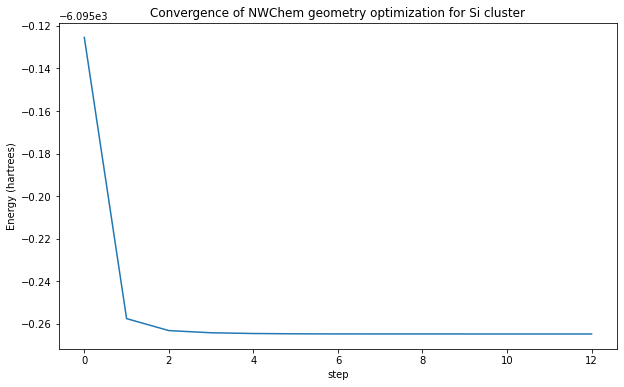

In [82]:
plt.figure(figsize=(10,6))
plt.plot(data[:,0])
plt.xlabel('step')
plt.ylabel('Energy (hartrees)')
plt.title('Convergence of NWChem geometry optimization for Si cluster')
plt.show()

I would write the code a little more succinctly if I were doing this for myself, but this is essentially a snippet I use repeatedly. 

### Combining `str.splitlines()`, `str.split()` and `map()` functions to parse complex data.
Suppose our data was in CSV (comma separated values) format, a format that originally came from Microsoft Excel, and is increasingly used as a data interchange format in big data applications. How would we parse that?

In [83]:
csv = """\
-6095.12544083, 0.03686, 1391.5
-6095.25762870, 0.00732, 10468.0
-6095.26325979, 0.00233, 11963.5
-6095.26428124, 0.00109, 13331.9
-6095.26463203, 0.00057, 14710.8
-6095.26477615, 0.00043, 20211.1
-6095.26482624, 0.00015, 21726.1
-6095.26483584, 0.00021, 24890.5
-6095.26484405, 0.00005, 26448.7
-6095.26484599, 0.00003, 27258.1
-6095.26484676, 0.00003, 28155.3
-6095.26484693, 0.00002, 28981.7
-6095.26484693, 0.00002, 28981.7"""

We can do much the same as before:

In [84]:
data = []
for line in csv.splitlines():
    words = line.split(',')
    data.append(list(map(float,words)))
data = np.array(data)
print(data)

[[-6.09512544e+03  3.68600000e-02  1.39150000e+03]
 [-6.09525763e+03  7.32000000e-03  1.04680000e+04]
 [-6.09526326e+03  2.33000000e-03  1.19635000e+04]
 [-6.09526428e+03  1.09000000e-03  1.33319000e+04]
 [-6.09526463e+03  5.70000000e-04  1.47108000e+04]
 [-6.09526478e+03  4.30000000e-04  2.02111000e+04]
 [-6.09526483e+03  1.50000000e-04  2.17261000e+04]
 [-6.09526484e+03  2.10000000e-04  2.48905000e+04]
 [-6.09526484e+03  5.00000000e-05  2.64487000e+04]
 [-6.09526485e+03  3.00000000e-05  2.72581000e+04]
 [-6.09526485e+03  3.00000000e-05  2.81553000e+04]
 [-6.09526485e+03  2.00000000e-05  2.89817000e+04]
 [-6.09526485e+03  2.00000000e-05  2.89817000e+04]]


There are two significant changes over what we did earlier. First, I'm passing the comma character ',' into the split function, so that it breaks to a new word every time it sees a comma. Next, to simplify things a big, I'm using the `map()` command to repeatedly apply a single function (`float()`) to a list, and to return the output as a `list`.

In [85]:
help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



Despite the differences, the resulting plot should be the same:

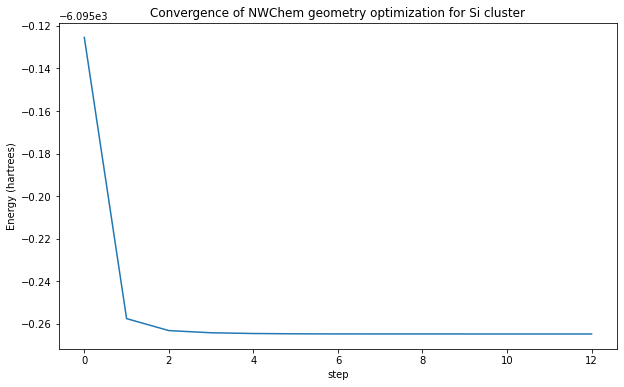

In [86]:
plt.figure(figsize=(10,6))
plt.plot(data[:,0])
plt.xlabel('step')
plt.ylabel('Energy (hartrees)')
plt.title('Convergence of NWChem geometry optimization for Si cluster')
plt.show()

### Selecting/filtering lines ()

The **string** module has a lot of useful functions we can use for this. Among them is the `str.startswith()` function. For example:

In [88]:
lines = """\
                 ----------------------------------------
                 |  WALL  |       0.45   |     443.61   |
                 ----------------------------------------

@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
                                                       ok       ok



                                Z-matrix (autoz)
                                --------
""".splitlines()

for line in lines:
    if line.startswith('@'):
        print(line)
        

@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5


and we've successfully grabbed all of the lines that begin with the @ symbol.

The real value in a language like Python is that it makes it easy to take additional steps to analyze data in this fashion, which means you are thinking more about your data, and are more likely to see important patterns.

## Output parsing from files

In [90]:
with open(datafile) as fin:
    for line in fin:
        print(line.strip("\n"))

@ Step       Energy      Delta E   Gmax     Grms     Xrms     Xmax   Walltime
@ ---- ---------------- -------- -------- -------- -------- -------- --------
@    0   -6095.12544083  0.0D+00  0.03686  0.00936  0.00000  0.00000   1391.5
@    1   -6095.25762870 -1.3D-01  0.00732  0.00168  0.32456  0.84140  10468.0
@    2   -6095.26325979 -5.6D-03  0.00233  0.00056  0.06294  0.14009  11963.5
@    3   -6095.26428124 -1.0D-03  0.00109  0.00024  0.03245  0.10269  13331.9
@    4   -6095.26463203 -3.5D-04  0.00057  0.00013  0.02737  0.09112  14710.8
@    5   -6095.26477615 -1.4D-04  0.00043  0.00009  0.02259  0.08615  20211.1
@    6   -6095.26482624 -5.0D-05  0.00015  0.00002  0.00831  0.03147  21726.1
@    7   -6095.26483584 -9.6D-06  0.00021  0.00004  0.01473  0.05265  24890.5
@    8   -6095.26484405 -8.2D-06  0.00005  0.00001  0.00555  0.01929  26448.7
@    9   -6095.26484599 -1.9D-06  0.00003  0.00001  0.00164  0.00564  27258.1
@   10   -6095.26484676 -7.7D-07  0.00003  0.00001  0.00161  0.0

/home/hector/ownCloudCESNET/repo/teaching/python/a2-PyIntro/data/Table_NWChem.txt


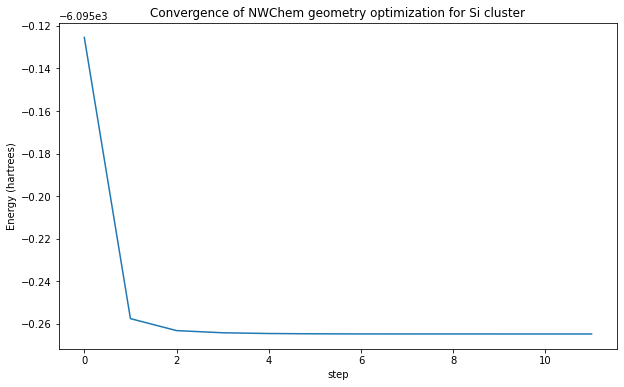

In [129]:
data = []
print(datafile)
with open(datafile) as fin:
    for line in fin:
        if "Step" in line:
            continue
        if "---" in line:
            continue
        words = line.split()[2:]
        # Remove weird notation in Delta E. D->e (scientific notation)
        words = list(map(lambda s : s.replace("D", "e"), words))
        #Transform each string number to float
        words = list(map(float, words))
        data.append(words)
# remove the last line that is repeated
data.pop(-1)
data = np.array(data)

# Print result
#print(data)

# Plot result
plt.figure(figsize=(10,6))
plt.plot(data[:,0])
plt.xlabel('step')
plt.ylabel('Energy (hartrees)')
plt.title('Convergence of NWChem geometry optimization for Si cluster')
plt.show()

## More Sophisticated String Formatting and Processing
Strings are a big deal in most modern languages, and hopefully the previous sections helped underscore how versatile Python's string processing techniques are. We will continue this topic in this chapter.

We can print out lines in Python using the print command. 

In [ ]:
print("I have 3 errands to run")

In IPython we don't even need the print command, since it will display the last expression not assigned to a variable.

In [ ]:
"I have 3 errands to run"

**print** even converts some arguments to strings for us:

In [132]:
a,b,c = 1,2,3
print(f"The variables are ",1,2,3)

The variables are  1 2 3


As versatile as this is, you typically need more freedom over the data you print out. For example, what if we want to print a bunch of data to exactly 4 decimal places? We can do this using formatted strings.

Formatted strings can be achieved using the format funtions of the strings. For examples check https://pyformat.info/.

For example,

In [137]:
print(f"Pi as a decimal = {np.pi:.0f}")
print(f"Pi as a float = {np.pi:f}")
print(f"Pi with 4 decimal places = {np.pi:.4f}")
print(f"Pi with overall fixed length of 10 spaces, with 6 decimal places = {np.pi:10.6f}")
print(f"Pi as in exponential format = {np.pi:e}")

Pi as a decimal = 3
Pi as a float = 3.141593
Pi with 4 decimal places = 3.1416
Pi with overall fixed length of 10 spaces, with 6 decimal places =   3.141593
Pi as in exponential format = 3.141593e+00


We Can also pipe several variables, or even print the same more than once:

In [138]:
print(f"The variables specified earlier are {a:d}, {b:d}, and {c:d} [repeated {a:d}]")

The variables specified earlier are 1, 2, and 3 [repeated 1]


This is a simple formatting structure that will satisfy most of your string formatting needs.More information check https://realpython.com/python-f-strings/ or http://zetcode.com/python/fstring/.

Avoid using old C formating string methods. They are weaker and prompt to errors.

Recall we discussed multiline strings. We can put format characters in these as well, and fill them with them as before.

In [140]:
date = "July 1, 2013"
name = "Valued Customer Bob"
reason = "alien attack"

form_letter = f"""\

          {date:s}

Dear {name:s},

We regret to inform you that your product did not
ship today due to {reason:s}.

We hope to remedy this as soon as possible.

          From,
          Your Supplier
"""


print(form_letter)


          July 1, 2013

Dear Valued Customer Bob,

We regret to inform you that your product did not
ship today due to alien attack.

We hope to remedy this as soon as possible.

          From,
          Your Supplier



If you need to reuse many time the string while substitutting by different values use `str.format()`

In [141]:
form_letter = """\

          {0:s}

Dear {1:s},

We regret to inform you that your product did not
ship today due to {2:s}.

We hope to remedy this as soon as possible.

          From,
          Your Supplier
"""

print(form_letter.format("July 1, 2013","Valued Customer Bob","alien attack"))


          July 1, 2013

Dear Valued Customer Bob,

We regret to inform you that your product did not
ship today due to alien attack.

We hope to remedy this as soon as possible.

          From,
          Your Supplier



The problem with a long block of text like this is that it's often hard to keep track of what all of the variables are supposed to stand for. There's an alternate format where you can pass a dictionary into the formatted string, and give a little bit more information to the formatted string itself. This method looks like:

As a scientist, you're less likely to be sending bulk mailings to a bunch of customers. But these are great methods for generating and submitting lots of similar runs, say scanning a bunch of different structures to find the optimal configuration for something. There are methods less prompt to error such as the following  example, that we can use the following template for NWChem input files:

In [142]:
nwchem_format = """
start {0[jobname]:s}

title "{0[thetitle]:s}"
charge {0[charge]:d}

geometry units angstroms print xyz autosym
{0[geometry]:s}
end

basis
  * library 6-31G**
end

dft
  xc {0[dft_functional]:s}
  mult {0[multiplicity]:d}
end

task dft {0[jobtype]:s}
"""

If you want to submit a sequence of runs to a computer somewhere, it's pretty easy to put together a little script, maybe even with some more string formatting in it:

In [143]:
oxygen_xy_coords = [(0,0),(0,0.1),(0.1,0),(0.1,0.1)]
charge = 0
multiplicity = 1
dft_functional = "b3lyp"
jobtype = "optimize"

geometry_template = """\
  O    {0[0]:.1f}    {0[1]:.1f}     0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0"""

for i,xy in enumerate(oxygen_xy_coords):
    thetitle = "Water run #{0:d}".format(i)
    jobname = "h2o-{0:d}".format(i)
    geometry = geometry_template.format(xy)
    print ("---------")
    print (nwchem_format.format(dict(thetitle=thetitle,charge=charge,jobname=jobname,jobtype=jobtype,
                               geometry=geometry,dft_functional=dft_functional,multiplicity=multiplicity)))

---------

start h2o-0

title "Water run #0"
charge 0

geometry units angstroms print xyz autosym
  O    0.0    0.0     0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc b3lyp
  mult 1
end

task dft optimize

---------

start h2o-1

title "Water run #1"
charge 0

geometry units angstroms print xyz autosym
  O    0.0    0.1     0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc b3lyp
  mult 1
end

task dft optimize

---------

start h2o-2

title "Water run #2"
charge 0

geometry units angstroms print xyz autosym
  O    0.1    0.0     0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc b3lyp
  mult 1
end

task dft optimize

---------

start h2o-3

title "Water run #3"
charge 0

geometry units angstroms print xyz autosym
  O    0.1    0.1     0.0
  H    0.0    1.0     0.0
  H    1.0    0.0     0.0
end

basis
  * library 6-31G**
end

dft
  xc

This is a very bad geometry for a water molecule, and it would be silly to run so many geometry optimizations of structures that are guaranteed to converge to the same single geometry, but you get the idea of how you can run vast numbers of simulations with a technique like this.

We used the `enumerate()` function to loop over both the indices and the items of a sequence, which is valuable when you want a clean way of getting both. `enumerate` is roughly equivalent to:

In [144]:
def my_enumerate(seq):
    l = []
    for i in range(len(seq)):
        l.append((i,seq[i]))
    return l
my_enumerate(oxygen_xy_coords)

[(0, (0, 0)), (1, (0, 0.1)), (2, (0.1, 0)), (3, (0.1, 0.1))]

Although enumerate uses **generators** (see below) so that it doesn't have to create a big list, which makes it faster for really long sequenes.

## List Comprehensions and Generators
List comprehensions are a streamlined way to make lists. They look something like a list definition, with some logic thrown in. For example:

In [ ]:
evens1 = [2*i for i in range(10)]
print(evens1)

You can also put some boolean testing into the construct:

In [ ]:
odds = [i for i in range(20) if i%2==1]
odds

Here i%2 is the remainder when i is divided by 2, so that i%2==1 is true if the number is odd. Even though this is a relative new addition to the language, it is now fairly common since it's so convenient.

**iterators** are a way of making virtual sequence objects. Consider if we had the nested loop structure:

    for i in range(1000000):
        for j in range(1000000):

Inside the main loop, we make a list of 1,000,000 integers, just to loop over them one at a time. We don't need any of the additional things that a lists gives us, like slicing or random access, we just need to go through the numbers one at a time. And we're making 1,000,000 of them. 

**iterators** are a way around this. For example, the **xrange** function is the iterator version of range. This simply makes a counter that is looped through in sequence, so that the analogous loop structure would look like:

    for i in xrange(1000000):
        for j in xrange(1000000):

Even though we've only added two characters, we've dramatically sped up the code, because we're not making 1,000,000 big lists.

We can define our own iterators using the **yield** statement:

In [ ]:
def evens_below(n):
    for i in range(n):
        if i%2 == 0:
            yield i
    return

for i in evens_below(9):
    print(i)

We can always turn an iterator into a list using the **list** command:

In [ ]:
list(evens_below(9))

There's a special syntax called a **generator expression** that looks a lot like a list comprehension:

In [ ]:
evens_gen = (i for i in range(9) if i%2==0)
for i in evens_gen:
    print(i)

## Factory Functions
A factory function is a function that returns a function. They have the fancy name *lexical closure*, which makes you sound really intelligent in front of your CS friends. But, despite the arcane names, factory functions can play a very practical role.

Suppose you want the Gaussian function centered at 0.5, with height 99 and width 1.0. You could write a general function.

In [ ]:
def gauss(x,A,a,x0):
    return A*np.exp(-a*(x-x0)**2)

But what if you need a function with only one argument, like f(x) rather than f(x,y,z,...)? You can do this with Factory Functions:

In [ ]:
def gauss_maker(A,a,x0):
    def f(x):
        return A*np.exp(-a*(x-x0)**2)
    return f

In [ ]:
x = np.linspace(0,1)
g = gauss_maker(99.0,1.0,0.5)
plt.plot(x,g(x))
plt.show()

Everything in Python is an object, including functions. This means that functions can be returned by other functions. (They can also be passed into other functions, which is also useful, but a topic for another discussion.) In the **gauss_maker** example, the *g* function that is output "remembers" the A, a, x0 values it was constructed with, since they're all stored in the local memory space (this is what the *lexical closure* really refers to) of that function.

Factories are one of the more important of the [Software Design Patterns](http://en.wikipedia.org/wiki/Software_design_pattern), which are a set of guidelines to follow to make high-quality, portable, readable, stable software. It's beyond the scope of the current work to go more into either factories or design patterns, but I thought I would mention them for people interested in software design.

## Serialization: Save it for later
*Serialization* refers to the process of outputting data (and occasionally functions) to a database or a regular file, for the purpose of using it later on. In the very early days of programming languages, this was normally done in regular text files. Python is excellent at text processing, and you probably already know enough to get started with this.

When accessing large amounts of data became important, people developed database software based around the Structured Query Language (SQL) standard. I'm not going to cover SQL here, but, if you're interested, I recommend using the [sqlite3](http://docs.python.org/2/library/sqlite3.html) module in the Python standard library.

As data interchange became important, the eXtensible Markup Language (XML) has emerged. XML makes data formats that are easy to write parsers for, greatly simplifying the ambiguity that sometimes arises in the process. Again, I'm not going to cover XML here, but if you're interested in learning more, look into [Element Trees](http://docs.python.org/2/library/xml.etree.elementtree.html), now part of the Python standard library.

Python has a very general serialization format called **pickle** that can turn any Python object, even a function or a class, into a representation that can be written to a file and read in later. But, again, I'm not going to talk about this, since I rarely use it myself. Again, [the standard library documentation for pickle](http://docs.python.org/2/library/pickle.html#module-cPickle) is the place to go.

What I am going to talk about is a relatively recent format call [JavaScript Object Notation](http://json.org/) (JSON) that has become very popular over the past few years. [There's a module in the standard library](http://docs.python.org/2/library/json.html) for encoding and decoding JSON formats. The reason I like JSON so much is that it looks almost like Python, so that, unlike the other options, you can look at your data and edit it, use it in another program, etc.

Here's a little example:

In [ ]:
# Data in a json format:
json_data = """\
{
    "a": [1,2,3],
    "b": [4,5,6],
    "greeting" : "Hello"
}"""
import json
json.loads(json_data)

Ignore the little u's before the strings, these just mean the strings are in UNICODE. Your data sits in something that looks like a Python dictionary, and in a single line of code, you can load it into a Python dictionary for use later.

In the same way, you can, with a single line of code, put a bunch of variables into a dictionary, and then output to a file using json:

In [ ]:
json.dumps({"a":[1,2,3],"b":[9,10,11],"greeting":"Hola"})

## Functional programming
Functional programming is a very broad subject. The idea is to have a series of functions, each of which generates a new data structure from an input, without changing the input structure at all. By not modifying the input structure (something that is called not having *side effects*), many guarantees can be made about how independent the processes are, which can help parallelization and guarantees of program accuracy. There is a [Python Functional Programming HOWTO](http://docs.python.org/2/howto/functional.html) in the standard docs that goes into more details on functional programming. I just wanted to touch on a few of the most important ideas here.

There is an **operator** module that has function versions of most of the Python operators. For example:

In [ ]:
from operator import add, mul
add(1,2)

In [ ]:
mul(3,4)

These are useful building blocks for functional programming.

The **lambda** operator allows us to build *anonymous functions*, which are simply functions that aren't defined by a normal **def** statement with a name. For example, a function that doubles the input is:

In [ ]:
def doubler(x): return 2*x
doubler(17)

We could also write this as:

In [ ]:
lambda x: 2*x

And assign it to a function separately:

In [ ]:
another_doubler = lambda x: 2*x
another_doubler(19)

**lambda** is particularly convenient (as we'll see below) in passing simple functions as arguments to other functions.

**map** is a way to repeatedly apply a function to a list:

In [ ]:
list(map(float,'1 2 3 4 5'.split()))

**reduce** is a way to repeatedly apply a function to the first two items of the list. There already is a **sum** function in Python that is a reduction:

In [ ]:
sum([1,2,3,4,5])

We can use **reduce** to define an analogous **prod** function:

In [ ]:
from functools import reduce
def prod(l): return reduce(mul,l)
prod([1,2,3,4,5])

## Object Oriented Programming

We've seen a lot of examples of **objects** in Python. We create a string object with quote marks:

In [ ]:
mystring = "Hi there"

and we have a bunch of methods we can use on the object:

In [ ]:
mystring.split()

In [ ]:
mystring.startswith('Hi')

In [ ]:
len(mystring)

Object oriented programming simply gives you the tools to define objects and methods for yourself. It's useful anytime you want to keep some data (like the characters in the string) tightly coupled to the functions that act on the data (length, split, startswith, etc.).

As an example, we're going to bundle the functions we did to make the 1d harmonic oscillator eigenfunctions with arbitrary potentials, so we can pass in a function defining that potential, some additional specifications, and get out something that can plot the orbitals, as well as do other things with them, if desired.

In [ ]:
class Schrod1d:
    """\
    Schrod1d: Solver for the one-dimensional Schrodinger equation.
    """
    def __init__(self,V,start=0,end=1,npts=50,**kwargs):
        m = kwargs.get('m',1.0)
        self.x = np.linspace(start,end,npts)
        self.Vx = V(self.x)
        self.H = (-0.5/m)*self.laplacian() + np.diag(self.Vx)
        return
    
    def plot(self,*args,**kwargs):
        titlestring = kwargs.get('titlestring',"Eigenfunctions of the 1d Potential")
        xstring = kwargs.get('xstring',"Displacement (bohr)")
        ystring = kwargs.get('ystring',"Energy (hartree)")
        if not args:
            args = [3]
        x = self.x
        E,U = np.linalg.eigh(self.H)
        h = x[1]-x[0]

        # Plot the Potential
        plt.figure(figsize=(8,8))
        plt.plot(x,self.Vx,color='k')

        for i in range(*args):
            # For each of the first few solutions, plot the energy level:
            plt.axhline(y=E[i],color='k',ls=":")
            # as well as the eigenfunction, displaced by the energy level so they don't
            # all pile up on each other:
            plt.plot(x,U[:,i]/np.sqrt(h)+E[i])
        plt.title(titlestring)
        plt.xlabel(xstring)
        plt.ylabel(ystring)
        plt.plot()
        return
        
    def laplacian(self):
        x = self.x
        h = x[1]-x[0] # assume uniformly spaced points
        n = len(x)
        M = -2*np.identity(n,'d')
        for i in range(1,n):
            M[i,i-1] = M[i-1,i] = 1
        return M/h**2

The **__init__()** function specifies what operations go on when the object is created. The **self** argument is the object itself, and we don't pass it in. The only required argument is the function that defines the QM potential. We can also specify additional arguments that define the numerical grid that we're going to use for the calculation.

For example, to do an infinite square well potential, we have a function that is 0 everywhere. We don't have to specify the barriers, since we'll only define the potential in the well, which means that it can't be defined anywhere else.

In [ ]:
square_well = Schrod1d(lambda x: 0*x,m=10)
square_well.plot(4,titlestring="Square Well Potential")

We can similarly redefine the Harmonic Oscillator potential.

In [ ]:
ho = Schrod1d(lambda x: x**2,start=-3,end=3)
ho.plot(6,titlestring="Harmonic Oscillator")

Let's define a finite well potential:

In [ ]:
def finite_well(x,V_left=1,V_well=0,V_right=1,d_left=10,d_well=10,d_right=10):
    V = np.zeros(x.size,'d')
    for i in range(x.size):
        if x[i] < d_left: 
            V[i] = V_left
        elif x[i] > (d_left+d_well):
            V[i] = V_right
        else:
            V[i] = V_well
    return V
        
fw = Schrod1d(finite_well,start=0,end=30,npts=100)
fw.plot()

A triangular well:

In [ ]:
def triangular(x,F=30): return F*x

tw = Schrod1d(triangular,m=10)
tw.plot()

Or we can combine the two, making something like a semiconductor quantum well with a top gate:

In [ ]:
def tri_finite(x): return finite_well(x)+triangular(x,F=0.025)

tfw = Schrod1d(tri_finite,start=0,end=30,npts=100)
tfw.plot()

There's a lot of philosophy behind object oriented programming. Since I'm trying to focus on just the basics here, I won't go into them, but the internet is full of lots of resources on OO programming and theory. The best of this is contained in the [Design Patterns](http://en.wikipedia.org/wiki/Design_Patterns_(book)) book, which I highly recommend.